In [1]:
ls

__notebook_source__.ipynb


In [2]:
import time
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import TensorBoard

import numpy as np
import PIL
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
def set_trainable(model, flag = False):
    for layer in model.layers:
        layer.trainable = flag

In [4]:
def path_join(dirname, filenames):
    return[os.path.join(dirname,filename) for filename in filenames]

In [5]:
!ls ../input/money_data/money_data/

convert.py  desktop.ini  test.jpg  test2.jpg  training	validation


In [6]:
batch_size = 20
num_classes = 2
epochs = 5

In [7]:
train_dir = '../input/money_data/money_data/training/'
val_dir = '../input/money_data/money_data/validation/'

In [8]:
input_shape = (300,300)

In [9]:
data_gen_train = keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=180, zoom_range=[0.9,1.3])

In [10]:
data_gen_val = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [11]:
generator_train = data_gen_train.flow_from_directory(directory=train_dir, target_size=input_shape, batch_size=70, shuffle=True)

Found 320 images belonging to 2 classes.


In [12]:
generator_val = data_gen_val.flow_from_directory(directory=val_dir, target_size=input_shape, batch_size=10, shuffle=True)

Found 140 images belonging to 2 classes.


In [13]:
pre_model = keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', input_shape=(300,300,3))
pre_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
80142336/80134624 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 300, 300, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_____

In [14]:
last_pre_layers = ['block5_pool']

In [15]:
for pre_layer in last_pre_layers:
    
    pre_layer_output = pre_model.get_layer(pre_layer)
    ref_model = keras.models.Model(inputs=pre_model.input, outputs=pre_layer_output.output)
    
    set_trainable(ref_model, flag=False)
    
    dense_values = [1024]
    
    for dense_val in dense_values:
        
        NAME = "x-lr-05-ep-200-retro-pre_layer-{}-dense-{}-time-{}".format(pre_layer, dense_val, int(time.time()))
        tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))
#         transfer_model.add(tf.layers.batch_normalization(input=ref_model))
        transfer_model = keras.models.Sequential()
        transfer_model.add(ref_model)
        transfer_model.add(keras.layers.Flatten())
        transfer_model.add(keras.layers.Dense(512, activation='relu'))
        transfer_model.add(keras.layers.Dense(128, activation='relu'))
        transfer_model.add(keras.layers.Dense(64, activation='relu'))
        transfer_model.add(keras.layers.Dense(8, activation='relu'))
        transfer_model.add(keras.layers.Dense(2, activation='softmax'))
        optimizer = keras.optimizers.Adam(lr=0.00001)
        loss = 'categorical_crossentropy'
        metrics = ['accuracy']
        transfer_model.compile(optimizer=optimizer, loss = loss, metrics=metrics)

        #history = transfer_model.fit_generator(generator=generator_train, epochs=epochs, steps_per_epoch=5, validation_data=generator_val, validation_steps=3)
        transfer_model.fit(generator_train, epochs=10, steps_per_epoch=5, validation_data=generator_val, validation_steps=5)
        #keras.models.save_model(transfer_model, filepath='../input/{}.model'.format(NAME))
        
        

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
5/5 [==============================] - 10s 2s/step - loss: 0.6795 - acc: 0.5781 - val_loss: 0.6483 - val_acc: 0.5786
Epoch 2/10
5/5 [==============================] - 7s 1s/step - loss: 0.6183 - acc: 0.6469 - val_loss: 0.5790 - val_acc: 0.7429
Epoch 3/10
5/5 [==============================] - 7s 1s/step - loss: 0.5627 - acc: 0.7781 - val_loss: 0.5394 - val_acc: 0.8357
Epoch 4/10
5/5 [==============================] - 8s 2s/step - loss: 0.5099 - acc: 0.8469 - val_loss: 0.4878 - val_acc: 0.8214
Epoch 5/10
5/5 [==============================] - 8s 2s/step - loss: 0.4608 - acc: 0.8500 - val_loss: 0.4452 - val_acc: 0.8643
Epoch 6/10
5/5 [==============================] - 7s 1s/step - loss: 0.4024 - acc: 0.8906 - val_loss: 0.3974 - val_acc: 0.8429
Epoch 7/10
5/5 [==============================] - 7s 1s/step - loss: 0.3737 - acc: 0.8781 - val_loss: 0.3469 - val_acc: 0.9071
Epoch 8/10
5/5 [==============================] - 7s 1s/step -

In [23]:
ls

__notebook_source__.ipynb
model.json
x-lr-05-ep-200-retro-pre_layer-block5_pool-dense-1024-time-1557474927.h5
x-lr-05-ep-200-retro-pre_layer-block5_pool-dense-1024-time-1557474927.model


In [22]:
with open("model.json", "w") as file:
    file.write(transfer_model.to_json())
keras.models.save_model(transfer_model, filepath='./{}.h5'.format(NAME))

In [24]:
import numpy as np
from keras.preprocessing import image


In [25]:
ls ../input/money_data/money_data/

convert.py  desktop.ini  test.jpg  test2.jpg  training/  validation/


Populating the interactive namespace from numpy and matplotlib


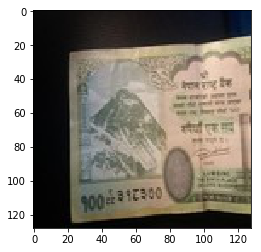

100 rupee
Populating the interactive namespace from numpy and matplotlib


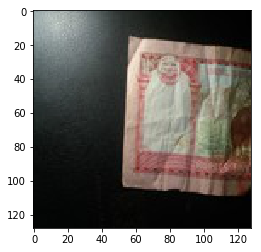

5 rupee


In [26]:
test_image = image.load_img('../input/money_data/money_data/test2.jpg',target_size=(300,300))
test_image = image.img_to_array(test_image)
test_image= np.expand_dims(test_image,axis = 0)
result = transfer_model.predict(test_image)
if result[0][0] >= 0.5:
    prediction = "100 rupee"
else:
    prediction = "5 rupee"

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('../input/money_data/money_data/test2.jpg')
imgplot = plt.imshow(img)
plt.show()
print(prediction)

test_image = image.load_img('../input/money_data/money_data/test.jpg',target_size=(300,300))
test_image = image.img_to_array(test_image)
test_image= np.expand_dims(test_image,axis = 0)
result = transfer_model.predict(test_image)
if result[0][0] >= 0.5:
    prediction = "100 rupee"
else:
    prediction = "5 rupee"

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('../input/money_data/money_data/test.jpg')
imgplot = plt.imshow(img)
plt.show()
print(prediction)
